Adam(1e-3),Dense(1024)

In [1]:
import os
import io
from zipfile import ZipFile
import pandas as pd
import tensorflow as tf
from PIL import Image
import numpy as np
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import *
import os
import zipfile
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-01-19 10:32:44.412337: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-19 10:32:44.540895: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-19 10:32:45.335877: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-01-1

In [2]:
#백내장 무 폴더 정리
img_dir0 = './eyes_train/eye_train/0'
img0 = os.listdir(img_dir0)
image0 = list(filter(lambda x: x.find('.jpg') != -1 or x.find('.png') != -1, img0))
label0 = list(filter(lambda x : x.find('.json')!=-1,img0))
image_0 = []
image_label0 = []
for i in image0:
    img = np.array(Image.open('./eyes_train/eye_train/0/{}'.format(i)))
    im = img[50:350,50:350]
    im0 = cv2.resize(im,(224,224))
    image_0.append(im0)
    image_label0.append(0)

In [3]:
#백내장 초기 폴더 정리
img_dir1 = './eyes_train/eye_train/1'
img1 = os.listdir(img_dir1)
image1 = list(filter(lambda x: x.find('.jpg') != -1 or x.find('.png') != -1, img1))
label1 = list(filter(lambda x : x.find('.json')!=-1,img1))
for i in image1:
    img = np.array(Image.open('./eyes_train/eye_train/1/{}'.format(i)))
    im = img[50:350,50:350]
    im1 = cv2.resize(im,(224,224))
    image_0.append(im1)
    image_label0.append(1)

In [4]:
#백내장 비성숙 폴더 정리
img_dir2 = './eyes_train/eye_train/2'
img2 = os.listdir(img_dir2)
image2 = list(filter(lambda x: x.find('.jpg') != -1 or x.find('.png') != -1, img2))
label2 = list(filter(lambda x : x.find('.json')!=-1,img2))
for i in image2:
    img = np.array(Image.open('./eyes_train/eye_train/2/{}'.format(i)))
    im = img[50:350,50:350]
    im2 = cv2.resize(im,(224,224))
    image_0.append(im2)
    image_label0.append(2)

In [5]:
#백내장 성숙 폴더 정리
img_dir3 = './eyes_train/eye_train/3'
img3 = os.listdir(img_dir3)
image3 = list(filter(lambda x: x.find('.jpg') != -1 or x.find('.png') != -1, img3))
label3 = list(filter(lambda x : x.find('.json')!=-1,img3))
for i in image3:
    img = np.array(Image.open('./eyes_train/eye_train/3/{}'.format(i)))
    im = img[50:350,50:350]
    im3 = cv2.resize(im,(224,224))
    image_0.append(im3)
    image_label0.append(3)

In [6]:
x = np.array(image_0)
y = np.array(image_label0)

In [7]:
#원핫 인코딩
y = np_utils.to_categorical(y)

In [8]:
#데이터 분할
x_train, x_val, y_train, y_val = train_test_split(x, y, shuffle =True, test_size = 0.2, random_state = 123)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, Dense, Flatten, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.applications.efficientnet import EfficientNetB5
from tensorflow.nn import silu
#EfficientNetB5불러오기
Eff = EfficientNetB5(weights = 'imagenet', input_shape = (224,224,3), include_top = False, pooling = 'avg')

2023-01-19 10:33:41.196701: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-19 10:33:41.833079: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38220 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:00:04.0, compute capability: 8.0


In [10]:
model = Sequential()
#분류기 직접 정리
model.add(Eff)
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('silu'))
model.add(Dense(4,activation = 'softmax'))
model.compile(optimizer=Adam(1e-3), # 옵티마이저 : rmsprop
              loss = 'categorical_crossentropy', # 손실 함수 : sparse_categorical_crossentropy
              metrics = ['accuracy']) # 모니터링 할 평가지표 : 
history = model.fit(x_train, y_train, 
                      epochs = 10, 
                      batch_size = 32, 
                      validation_data = (x_val, y_val))

Epoch 1/10


2023-01-19 10:34:27.404216: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnetb5/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-01-19 10:34:33.568778: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8200
2023-01-19 10:34:35.202880: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-01-19 10:34:35.256444: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7efe0c0896e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-01-19 10:34:35.256475: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
2023-01-19 10:34:35.262429: I tensorflow/compiler/mlir/tensorflow/u

688/688 [==============================] - 231s 209ms/step - loss: 0.6536 - accuracy: 0.7200 - val_loss: 1.4415 - val_accuracy: 0.3021
Epoch 2/10
688/688 [==============================] - 140s 203ms/step - loss: 0.5658 - accuracy: 0.7594 - val_loss: 0.5405 - val_accuracy: 0.7858
Epoch 3/10
688/688 [==============================] - 140s 203ms/step - loss: 0.5305 - accuracy: 0.7812 - val_loss: 1.1971 - val_accuracy: 0.7280
Epoch 4/10
688/688 [==============================] - 140s 203ms/step - loss: 0.4453 - accuracy: 0.8177 - val_loss: 0.4457 - val_accuracy: 0.8201
Epoch 5/10
688/688 [==============================] - 140s 203ms/step - loss: 0.5474 - accuracy: 0.7853 - val_loss: 4931.0020 - val_accuracy: 0.2593
Epoch 6/10
688/688 [==============================] - 139s 203ms/step - loss: 0.7483 - accuracy: 0.6848 - val_loss: 0.5924 - val_accuracy: 0.7529
Epoch 7/10
688/688 [==============================] - 139s 203ms/step - loss: 0.5344 - accuracy: 0.7705 - val_loss: 0.5009 - val_acc

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb5 (Functional)  (None, 2048)             28513527  
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 30,619,899
Trainable params: 30,445,108
Non-trainable params: 174,791
______________________________________

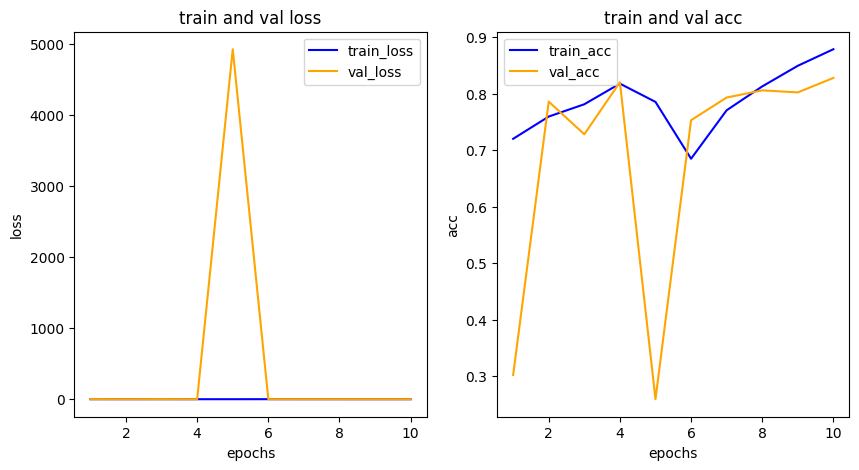

In [12]:
# 정확도와 로스 그래프
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [13]:
# 6. 모델 저장하기
from tensorflow.keras.models import load_model
model.save('./EfficientNetB5_32_tuning03.h5')

TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.

In [14]:
#정확도 f1
from sklearn.metrics import *
def get_clf_eval(y_test,pred): 
  f1 = f1_score(y_test,pred,average="macro") 
  acc = accuracy_score(y_val,predict)   
  loss = model.evaluate(x_val, y_val, batch_size=32)
  print('정확도 :',acc)
  print('f1 score:',f1)
  print('loss :',loss )

In [15]:
predcit = model.predict(x_val)
predict = []
for i in np.arange(len(predcit)):
  labels = np.argmax(predcit[i])
  predict.append(labels)
predict = np.array(predict)
predict = np_utils.to_categorical(predict)

172/172 [==============================] - 10s 41ms/step


In [16]:
#EfficientNetB4
get_clf_eval(y_val,predict)

172/172 [==============================] - 7s 42ms/step - loss: 0.4516 - accuracy: 0.8278
정확도 : 0.8277616279069767
f1 score: 0.8233635307560455
loss : [0.4515525996685028, 0.8277616500854492]
